# 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import pingouin

In [2]:
control = pd.read_excel('microbial enumeration.xlsx')
week_1 = pd.read_excel('microbial enumeration.xlsx', sheet_name='wk1_experiment')
week_4 = pd.read_excel('microbial enumeration.xlsx', sheet_name='wk4_experiment')

In [3]:
control

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l
0,B1,15,17,0,0,3,2
1,B2,11,8,0,0,2,2
2,B3,0,0,0,0,0,0
3,B4,4,5,0,0,0,0
4,B5,7,5,0,0,0,0
5,B6,0,0,0,0,2,1
6,B7,5,7,0,0,0,0
7,B9,12,10,0,0,1,0
8,B11,0,0,0,0,0,0
9,B12,5,5,0,0,0,0


In [4]:
week_1

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l
0,S1,27,32,0,0,5,3
1,S2,21,25,0,0,2,2
2,S3,13,11,0,0,4,3
3,S4,5,7,0,0,1,2
4,S5,15,17,0,0,2,3
5,S6,8,10,0,0,5,3
6,S8,23,18,0,0,5,5
7,S9,12,10,0,0,2,1
8,S10,8,11,0,0,3,3
9,S11,15,17,0,0,2,2


In [5]:
week_4

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l
0,B1,38,35,0,0,8,6
1,B2,27,31,0,0,7,5
2,B3,22,27,0,0,10,8
3,B4,11,13,0,0,3,3
4,B5,23,27,0,0,5,7
5,B6,17,21,0,0,11,9
6,B8,35,32,0,0,7,5
7,B9,27,24,0,0,4,5
8,B10,10,13,0,0,8,6
9,B11,28,25,0,0,5,3


In [6]:
control['Sample Code'] = control['Sample Code'].str.replace('B', 'S').str.strip()
control

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l
0,S1,15,17,0,0,3,2
1,S2,11,8,0,0,2,2
2,S3,0,0,0,0,0,0
3,S4,4,5,0,0,0,0
4,S5,7,5,0,0,0,0
5,S6,0,0,0,0,2,1
6,S7,5,7,0,0,0,0
7,S9,12,10,0,0,1,0
8,S11,0,0,0,0,0,0
9,S12,5,5,0,0,0,0


In [7]:
week_4['Sample Code'] = week_4['Sample Code'].str.replace('B', 'S').str.strip()
week_4

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l
0,S1,38,35,0,0,8,6
1,S2,27,31,0,0,7,5
2,S3,22,27,0,0,10,8
3,S4,11,13,0,0,3,3
4,S5,23,27,0,0,5,7
5,S6,17,21,0,0,11,9
6,S8,35,32,0,0,7,5
7,S9,27,24,0,0,4,5
8,S10,10,13,0,0,8,6
9,S11,28,25,0,0,5,3


In [8]:
control['TVC_total'] = control['TVC_r'] + control['TVC_l']
control['TFC_total'] = control['TFC_r'] + control['TFC_l']
control

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total
0,S1,15,17,0,0,3,2,32,5
1,S2,11,8,0,0,2,2,19,4
2,S3,0,0,0,0,0,0,0,0
3,S4,4,5,0,0,0,0,9,0
4,S5,7,5,0,0,0,0,12,0
5,S6,0,0,0,0,2,1,0,3
6,S7,5,7,0,0,0,0,12,0
7,S9,12,10,0,0,1,0,22,1
8,S11,0,0,0,0,0,0,0,0
9,S12,5,5,0,0,0,0,10,0


In [9]:
week_1['TVC_total'] = week_1['TVC_r'] + week_1['TVC_l']
week_1['TFC_total'] = week_1['TFC_r'] + week_1['TFC_l']
week_1

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total
0,S1,27,32,0,0,5,3,59,8
1,S2,21,25,0,0,2,2,46,4
2,S3,13,11,0,0,4,3,24,7
3,S4,5,7,0,0,1,2,12,3
4,S5,15,17,0,0,2,3,32,5
5,S6,8,10,0,0,5,3,18,8
6,S8,23,18,0,0,5,5,41,10
7,S9,12,10,0,0,2,1,22,3
8,S10,8,11,0,0,3,3,19,6
9,S11,15,17,0,0,2,2,32,4


In [10]:
week_4['TVC_total'] = week_4['TVC_r'] + week_4['TVC_l']
week_4['TFC_total'] = week_4['TFC_r'] + week_4['TFC_l']
week_4

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total
0,S1,38,35,0,0,8,6,73,14
1,S2,27,31,0,0,7,5,58,12
2,S3,22,27,0,0,10,8,49,18
3,S4,11,13,0,0,3,3,24,6
4,S5,23,27,0,0,5,7,50,12
5,S6,17,21,0,0,11,9,38,20
6,S8,35,32,0,0,7,5,67,12
7,S9,27,24,0,0,4,5,51,9
8,S10,10,13,0,0,8,6,23,14
9,S11,28,25,0,0,5,3,53,8


In [11]:
control = control[(control['TVC_total']>= 7) & (control['TVC_total'] <= 23)]

control

,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total
1,S2,11,8,0,0,2,2,19,4
3,S4,4,5,0,0,0,0,9,0
4,S5,7,5,0,0,0,0,12,0
6,S7,5,7,0,0,0,0,12,0
7,S9,12,10,0,0,1,0,22,1
9,S12,5,5,0,0,0,0,10,0
10,S13,7,4,0,0,2,2,11,4
14,S17,11,8,0,0,3,3,19,6
15,S18,7,9,0,0,0,0,16,0
17,S20,6,5,0,0,0,0,11,0


In [12]:
control['week'] = 0

control

/tmp/ipykernel_22536/1623811030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['week'] = 0


,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total,week
1,S2,11,8,0,0,2,2,19,4,0
3,S4,4,5,0,0,0,0,9,0,0
4,S5,7,5,0,0,0,0,12,0,0
6,S7,5,7,0,0,0,0,12,0,0
7,S9,12,10,0,0,1,0,22,1,0
9,S12,5,5,0,0,0,0,10,0,0
10,S13,7,4,0,0,2,2,11,4,0
14,S17,11,8,0,0,3,3,19,6,0
15,S18,7,9,0,0,0,0,16,0,0
17,S20,6,5,0,0,0,0,11,0,0


In [15]:
week_1 = week_1[week_1['Sample Code'].isin(control['Sample Code'])]
week_1['week'] = 1

week_1

/tmp/ipykernel_22536/2092791842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_1['week'] = 1


,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total,week
1,S2,21,25,0,0,2,2,46,4,1
3,S4,5,7,0,0,1,2,12,3,1
4,S5,15,17,0,0,2,3,32,5,1
7,S9,12,10,0,0,2,1,22,3,1
10,S13,5,7,0,0,4,3,12,7,1
14,S17,11,13,0,0,5,4,24,9,1
15,S18,7,5,0,0,4,3,12,7,1


In [16]:
week_4 = week_4[week_4['Sample Code'].isin(control['Sample Code'])]
week_4['week'] = 4

week_4

/tmp/ipykernel_22536/3130772014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_4['week'] = 4


,Sample Code,TVC_r,TVC_l,TCC_r,TCC_l,TFC_r,TFC_l,TVC_total,TFC_total,week
1,S2,27,31,0,0,7,5,58,12,4
3,S4,11,13,0,0,3,3,24,6,4
4,S5,23,27,0,0,5,7,50,12,4
7,S9,27,24,0,0,4,5,51,9,4
10,S13,11,9,0,0,4,5,20,9,4
14,S17,11,13,0,0,3,2,24,5,4
15,S18,15,11,0,0,4,3,26,7,4


In [17]:
data = control[['Sample Code', 'TVC_total', 'TFC_total']]\
        .merge(week_1[['Sample Code', 'TVC_total', 'TFC_total']], on='Sample Code', suffixes=('', '_wk1'))\
        .merge(week_4[['Sample Code', 'TVC_total', 'TFC_total']], on='Sample Code', suffixes=('', '_wk4'))

data

,Sample Code,TVC_total,TFC_total,TVC_total_wk1,TFC_total_wk1,TVC_total_wk4,TFC_total_wk4
0,S2,19,4,46,4,58,12
1,S4,9,0,12,3,24,6
2,S5,12,0,32,5,50,12
3,S9,22,1,22,3,51,9
4,S13,11,4,12,7,20,9
5,S17,19,6,24,9,24,5
6,S18,16,0,12,7,26,7


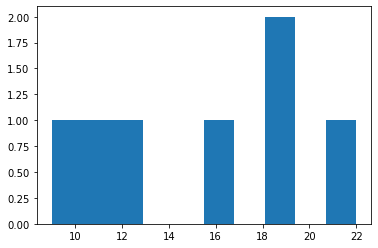

In [18]:
plt.hist(data.TVC_total);

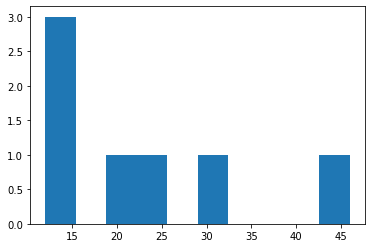

In [19]:
plt.hist(data.TVC_total_wk1);

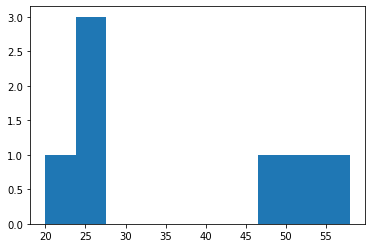

In [20]:
plt.hist(data.TVC_total_wk4);

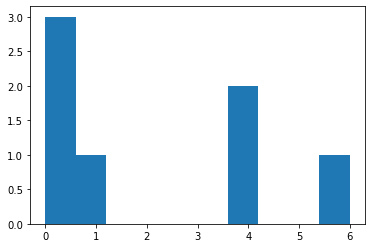

In [21]:
plt.hist(data.TFC_total);

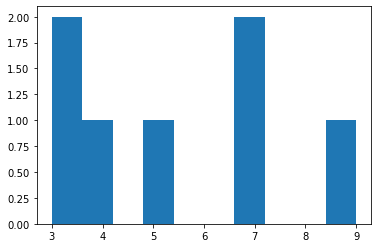

In [22]:
plt.hist(data.TFC_total_wk1);

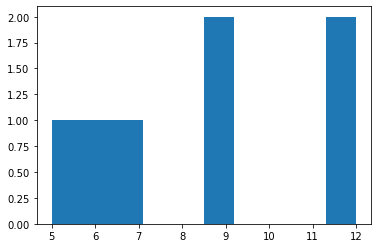

In [23]:
plt.hist(data.TFC_total_wk4);

In [24]:
data['wk1_diff'] = data.TVC_total_wk1 - data.TVC_total
data['wk4_diff'] = data.TVC_total_wk4 - data.TVC_total

data

,Sample Code,TVC_total,TFC_total,TVC_total_wk1,TFC_total_wk1,TVC_total_wk4,TFC_total_wk4,wk1_diff,wk4_diff
0,S2,19,4,46,4,58,12,27,39
1,S4,9,0,12,3,24,6,3,15
2,S5,12,0,32,5,50,12,20,38
3,S9,22,1,22,3,51,9,0,29
4,S13,11,4,12,7,20,9,1,9
5,S17,19,6,24,9,24,5,5,5
6,S18,16,0,12,7,26,7,-4,10


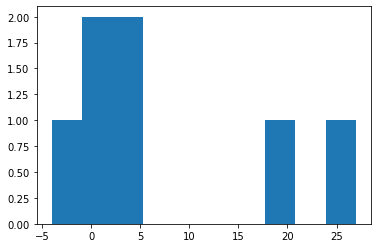

In [25]:
plt.hist(data.wk1_diff);

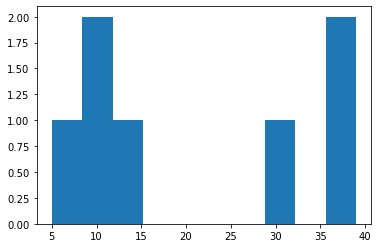

In [26]:
plt.hist(data.wk4_diff);

In [27]:
np.random.seed(10)

bootstrap_dist = []

for _ in range(10000):
    sample = data.wk1_diff.sample(frac=1, replace=True)
    bootstrap_dist.append(sample.mean())
    
np.mean(bootstrap_dist)

7.384057142857143

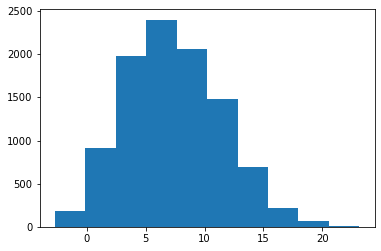

In [28]:
plt.hist(bootstrap_dist);

In [29]:
np.quantile(bootstrap_dist, 0.025), np.quantile(bootstrap_dist, 0.975)

(0.2857142857142857, 15.714285714285714)

In [30]:
np.std(bootstrap_dist, ddof=1)

4.037547205002167

In [31]:
pingouin.ttest(x=data['TVC_total_wk1'],
               y=data['TVC_total'],
               paired=True,
               alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.708826,6,two-sided,0.138343,"[-3.21, 18.07]",0.77011,0.956,0.403012


In [32]:
pingouin.ttest(x=data['TFC_total_wk1'],
               y=data['TFC_total'],
               paired=True,
               alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.925273,6,two-sided,0.007755,"[1.24, 5.33]",1.374513,8.175,0.855314


In [33]:
pingouin.ttest(x=data['TVC_total_wk4'],
               y=data['TVC_total'],
               paired=True,
               alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.822413,6,two-sided,0.008736,"[7.45, 33.97]",1.745194,7.454,0.96745


In [34]:
pingouin.ttest(x=data['TFC_total_wk4'],
               y=data['TFC_total'],
               paired=True,
               alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.303643,6,two-sided,0.005073,"[2.77, 10.08]",2.4507,11.374,0.999536
